In [ ]:
#Imoprting all Necessary Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plot graphs
import seaborn as sns  #plot graphs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score, classification_report
from sklearn.model_selection import train_test_split , cross_val_score, RandomizedSearchCV
import warnings  # ignore all warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape #Cheking the number of Rows & Columns 

(569, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
print(df.select_dtypes(include=['float64','int64']).columns) #Printing the Names on all the Numerical Columns
print(len(df.select_dtypes(include=['float64','int64']).columns)) #Printing the total number of Numerical Columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
32


In [ ]:
df.describe() # Staistical Summary 

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.columns #Printing the names of all the columns in the dataset

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
#Dealing with Null Values
print(f'Total Missing Values from the whole data set are: ', df.isnull().values.sum())  # Checking the total Null Values of the whole data set 
print(f'Number of Columns with Missing Values are: ', len(df.columns[df.isnull().any()])) #No of Columns with Missing Valeus
print(f'Names of the Columns with Missing Values are: ', df.columns[df.isnull().any()]) #Checking the Name of the columns with null values

Total Missing Values from the whole data set are:  569
Number of Columns with Missing Values are:  1
Names of the Columns with Missing Values are:  Index(['Unnamed: 32'], dtype='object')


In [ ]:
print(f'Total Number of Missing Values in the Column "Unnamed: 32" is: ',df['Unnamed: 32'].isnull().count()) #Checking the Total number of Missing values in the column 'Unnamed: 32'

Total Number of Missing Values in the Column "Unnamed: 32" is:  569


In [ ]:
df.drop(columns='Unnamed: 32', inplace=True) #Droping the column'Unnamed: 32'
print('Droped Column "Unnamed: 32"')

Droped Column "Unnamed: 32"


In [ ]:
print(f'There are ',df.isnull().values.sum(), ' Null Values is the Dataset')

There are  0  Null Values is the Dataset


In [ ]:
print(f'Catigorical Columns: ', df.select_dtypes(include='object').columns) #Printing the Names on all the Categorical Columns
print(f'No of Catigorical Columns: ',len(df.select_dtypes(include='object').columns)) #Printing the total number of Categorical Columns

Catigorical Columns:  Index(['diagnosis'], dtype='object')
No of Catigorical Columns:  1


In [ ]:
print(f"Unique Values in Column 'diagnosis' are ['malignant' 'benign']:", df.diagnosis.unique()) #Getting all Unique Values in Column 'diagnosis'
print(f"Total Number of unique Values in Column 'diagnosis' are: ",df.diagnosis.nunique()) #Getting Total Number of unique Values in Column 'diagnosis'

Unique Values in Column 'diagnosis' are ['malignant' 'benign']: ['M' 'B']
Total Number of unique Values in Column 'diagnosis' are:  2


In [ ]:
# One Hot Encoding 
df = pd.get_dummies(data=df, drop_first=True) #One Hot Encoding the Catigorical/label Column and droping the previous Column

In [ ]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
df[['diagnosis_M']].head() #Get the One Hot Encoded Column

,diagnosis_M
0,1
1,1
2,1
3,1
4,1


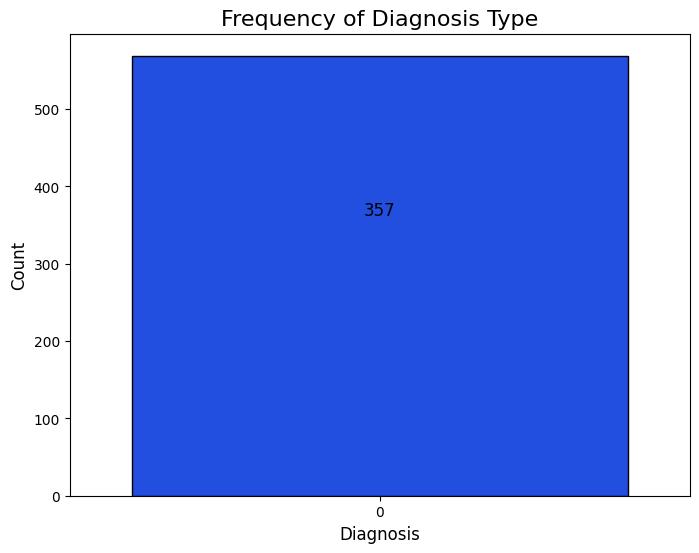

Total Values: 569


In [ ]:
#Plotting a Countplot to Explore the Label column
plt.figure(figsize=(8, 6))
sns.countplot(df['diagnosis_M'], palette='bright', edgecolor='black') 

# Adding a title and labels to the plot
plt.title('Frequency of Diagnosis Type', fontsize=16)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding annotations to the bars
for i in range(len(df['diagnosis_M'].value_counts())):
    count = df['diagnosis_M'].value_counts()[i]
    label = count
    plt.annotate(label, (i, count), ha='center', va='bottom', fontsize=12)
    

plt.show()

#Getting the total values
print(f'Total Values:',  df.diagnosis_M.count()) 

In [ ]:
#Creating a new variable witout he label column 'diagnosis_M'
df2 = df.drop(columns='diagnosis_M') 
df2.head()  #Checking the dataset if the label columns is droped in the new varibale

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


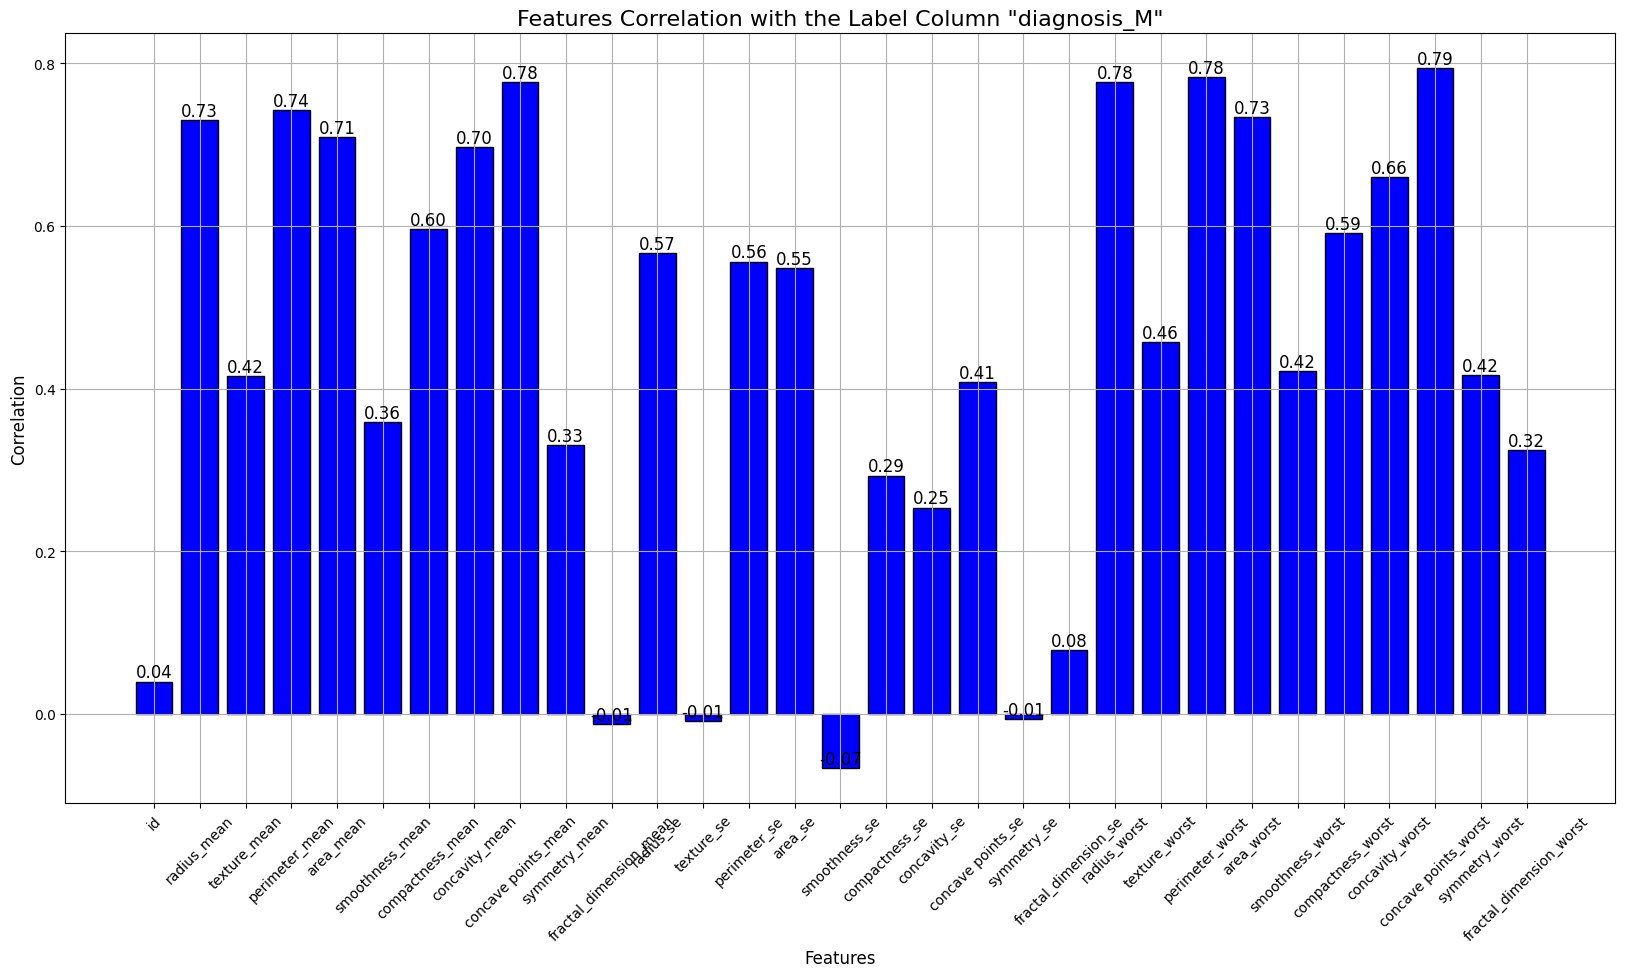

In [ ]:
# Computing the correlation between the features and the label column
corrw = df2.corrwith(df['diagnosis_M'])

# Plotting the bar chart using matplotlib
plt.figure(figsize=(20, 10))
plt.bar(corrw.index, corrw.values, color='blue', edgecolor='black')

# Adding title, labels, and grid to the plot
plt.title('Features Correlation with the Label Column "diagnosis_M"', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Adding annotations to the bars
for i, value in enumerate(corrw.values):
    label = f"{value:.2f}"
    plt.annotate(label, (i, value), ha='center', va='bottom', fontsize=12)

# Displaying the plot
plt.show()

In [ ]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
X = df.iloc[:, 1:-1].values # defing the Features/Independent Variable 
y = df.iloc[:,-1].values # defing the Label/Dependent/Target Variable

In [ ]:
print(f'Features X: ',X.shape) #Printing the Features Shape
print(f'Label Y : ',y.shape)  #Printing the Labels Shape

Features X:  (569, 30)
Label Y :  (569,)


In [ ]:
# spitting the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #Applying Train & Test split

In [ ]:
print(f'X_train',X_train.shape)  #Printing the X_train Features Shape
print(f'y_train',y_train.shape)  #Printing the y_train Labels Shape
print(f'X_test',X_test.shape)    #Printing the X_test Features Shape
print(f'y_test',y_test.shape)    #Printing the y_test Labels  Shape

X_train (455, 30)
y_train (455,)
X_test (114, 30)
y_test (114,)


In [ ]:
ss= StandardScaler() #Defing the Ss variable as StandardScaler
X_train = ss.fit_transform(X_train) #Appling the fit Transform on the X_train 
X_test = ss.transform(X_test) #Appling only transform on X_test to avoid Overfitting 


In [ ]:
X_train #Checking if the X_train is scalled 

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [ ]:
# Defining a common function for confusion matrix
def confusionmatrix(y,predd):
  class_names = ['Positive', 'Negative']
  cm = confusion_matrix(y, predd)
  fig, ax = plt.subplots()
  im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  ax.figure.colorbar(im, ax=ax)
  ax.set(xticks=np.arange(cm.shape[1]),
         yticks=np.arange(cm.shape[0]),
         xticklabels=class_names, yticklabels=class_names,
         title='Confusion Matrix',
         ylabel='True label',
         xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      ax.text(j, i, format(cm[i, j]),
              ha="center", va="center",
              color="white" if cm[i, j] > thresh else "black")
  fig.tight_layout()  
  plt.show()


In [ ]:
# Defining a common Function for Model Details
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n")
        confusionmatrix(y_train, pred)
        print("_______________________________________________")
        print(f"Training Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n ")
        confusionmatrix(y_test, pred)
        print("_______________________________________________")
        print(f"Testing Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%\n")

In [ ]:
# Defining a common function for Accuracies
def train_acc(y_train, clf):
  a = accuracy_score(y_train, clf.predict(X_train))
  return a

def test_acc(y_test, clf):
  b = accuracy_score(y_test, clf.predict(X_test))
  return b

Train Result:
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.986348    0.993827  0.989011    0.990088      0.989060
recall       0.996552    0.975758  0.989011    0.986155      0.989011
f1-score     0.991424    0.984709  0.989011    0.988067      0.988989
support    290.000000  165.000000  0.989011  455.000000    455.000000
_______________________________________________
Confusion Matrix: 



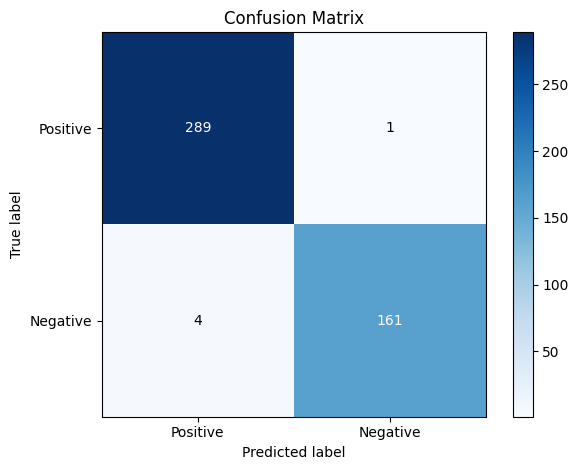

_______________________________________________
Training Accuracy Score: 98.90%

Test Result:
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.970149   0.957447  0.964912    0.963798      0.964912
recall      0.970149   0.957447  0.964912    0.963798      0.964912
f1-score    0.970149   0.957447  0.964912    0.963798      0.964912
support    67.000000  47.000000  0.964912  114.000000    114.000000
_______________________________________________
Confusion Matrix: 
 


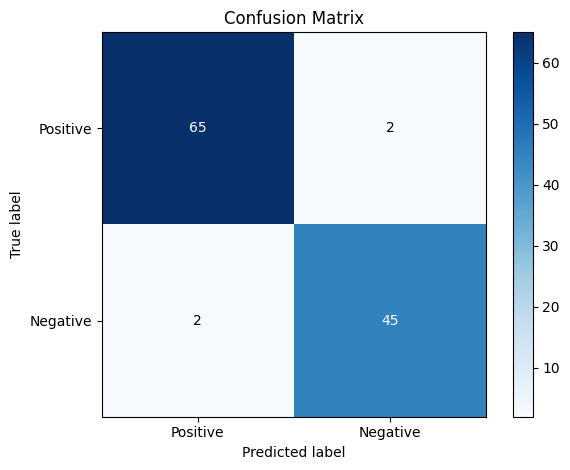

_______________________________________________
Testing Accuracy Score: 96.49%



,Model,Training Accuracy,Testing Accuracy
0,Logistic Regression,0.989011,0.964912


In [ ]:
# LOGISTIC REGRESSION CLASSIFIER
lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

lr_clf_train = train_acc(y_train,lr_clf)
lr_clf_test = test_acc(y_test, lr_clf)

results = pd.DataFrame([['Logistic Regression', lr_clf_train, lr_clf_test]],
                      columns=['Model', 'Training Accuracy', 'Testing Accuracy'])

#Printing the Model Results with different Metrics
results

Train Result:
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.996564    1.000000  0.997802    0.998282      0.997810
recall       1.000000    0.993939  0.997802    0.996970      0.997802
f1-score     0.998279    0.996960  0.997802    0.997620      0.997801
support    290.000000  165.000000  0.997802  455.000000    455.000000
_______________________________________________
Confusion Matrix: 



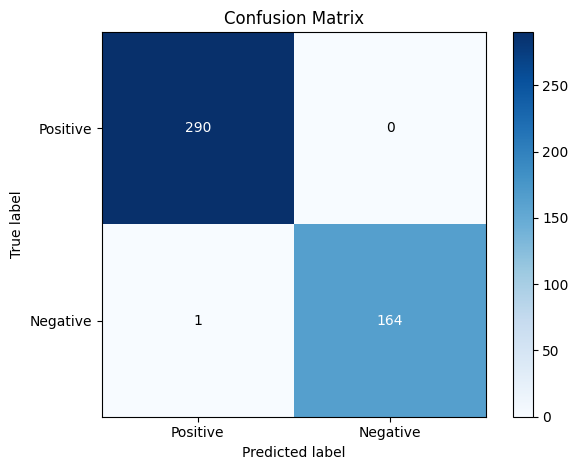

_______________________________________________
Training Accuracy Score: 99.78%

Test Result:
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.942857   0.977273   0.95614    0.960065      0.957046
recall      0.985075   0.914894   0.95614    0.949984      0.956140
f1-score    0.963504   0.945055   0.95614    0.954279      0.955898
support    67.000000  47.000000   0.95614  114.000000    114.000000
_______________________________________________
Confusion Matrix: 
 


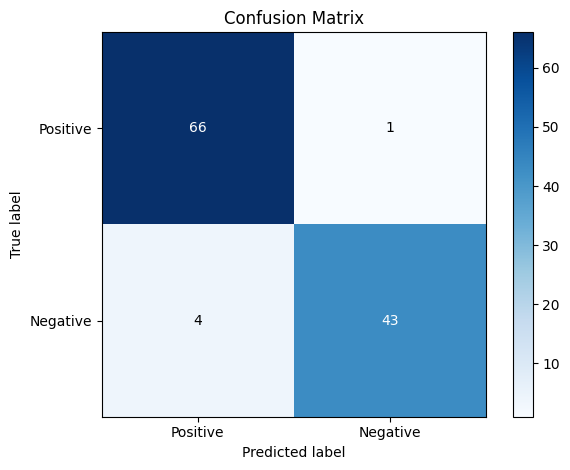

_______________________________________________
Testing Accuracy Score: 95.61%



,Model,Training Accuracy,Testing Accuracy
0,Logistic Regression,0.989011,0.964912
1,Random Forest Classifier,0.997802,0.956140


In [ ]:
# RANDOM FOREST CLASSIFIER
rf_clf = RandomForestClassifier(random_state=0, n_estimators=10)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

rf_clf_train = train_acc(y_train,rf_clf)
rf_clf_test = test_acc(y_test, rf_clf)

rf_results = pd.DataFrame([['Random Forest Classifier', rf_clf_train, rf_clf_test]],
                      columns=['Model', 'Training Accuracy', 'Testing Accuracy'])

results = results.append(rf_results, ignore_index=True)
#Printing the Model Results with different Metrics
results